# Notebook to analyzize data for ML characterization paper 

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd 
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, interact_manual
import os
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
sns.set_context("paper")
sns.set_style("ticks")
sns.set_palette("deep")

## SUMMARY

In [13]:
data_csv = "./summary.csv"
data_df = pd.read_csv(data_csv, comment='#')
data_df

,Scenario,Number of individuals,Makespan
0,Pegasus + Decaf,10,8543.737115
1,Pegasus + Decaf,10,8545.564757
2,Pegasus + Decaf,10,8617.368437
3,Pegasus + Decaf,16,5408.824278
4,Pegasus + Decaf,16,5548.862150
5,Pegasus + Decaf,16,5746.533455
6,Pegasus + Decaf,2,46043.560966
7,Pegasus + Decaf,2,48048.073383
8,Pegasus + Decaf,2,45851.159791
9,Pegasus + Decaf,5,17509.077754


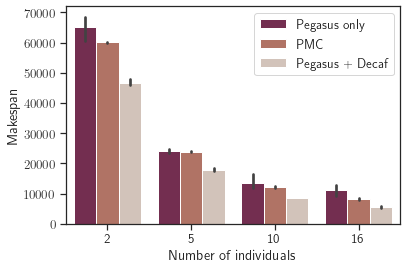

In [20]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")
sns.set_palette("twilight_shifted_r")
hue_order = ['Pegasus only', 'PMC', 'Pegasus + Decaf']
ax = sns.barplot(x='Number of individuals', y='Makespan', hue='Scenario', data=data_df, hue_order=hue_order)
ax.legend_.set_title("")
# plt.savefig('walltime.png', bbox_inches='tight', dpi=12000)
plt.savefig('walltime.png', bbox_inches='tight')

In [8]:
data_df['Average'] = data_df.groupby(['Scenario','Number of individuals'])['Makespan'].transform('mean')
temp_df = data_df[['Scenario','Number of individuals','Average']].drop_duplicates() 
temp_df['Percentage of Pegasus only (\%)'] = temp_df['Average']*100 / temp_df.groupby('Number of individuals')['Average'].transform('max')
temp_df

,Scenario,Number of individuals,Average,Percentage of Pegasus only (\%)
0,Pegasus + Decaf,10,8568.890103,62.773198
3,Pegasus + Decaf,16,5568.073294,49.191260
6,Pegasus + Decaf,2,46647.598047,71.598292
9,Pegasus + Decaf,5,17850.197317,73.919799
12,Pegasus only,10,13650.555333,100.000000
15,Pegasus only,16,11319.233000,100.000000
18,Pegasus only,2,65151.830667,100.000000
21,Pegasus only,5,24148.060000,100.000000
24,PMC,10,12103.822957,88.669088
26,PMC,16,8157.573478,72.068253


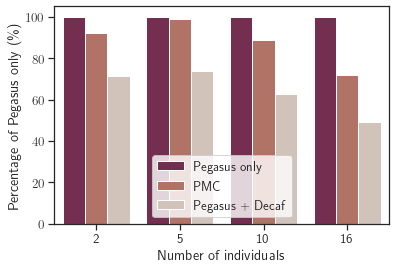

In [19]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")
sns.set_palette("twilight_shifted_r")
hue_order = ['Pegasus only', 'PMC', 'Pegasus + Decaf']
ax = sns.barplot(x='Number of individuals', y='Percentage of Pegasus only (\%)', hue='Scenario', data=temp_df, hue_order=hue_order)
ax.legend_.set_title("")
plt.legend(loc=8)
# plt.savefig('walltime.png', bbox_inches='tight', dpi=12000)
plt.savefig('percentage.png', bbox_inches='tight')

Todo: Normalize to pegasus